# Importing the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from xgboost import XGBRegressor
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Dropout, LSTM
from sklearn.ensemble import IsolationForest

# Data Collection and Processing

In [2]:
# loading the csv data to a Pandas DataFrame
ev= pd.read_csv('C:\\Users\\Dell\\Desktop\\pp/bigg.csv')

In [3]:
# print first 5 rows in the dataframe
ev.head()

,id,clusterId,connectionTime,Num.Rep.,disconnectTime,donechargingTime,SessionLength,Avg.Sess.,kWhDelivered,Avg.Cons.,...,Precip Type,temperature,Avg. Humidity,Avg Wind Speed(mph),Wind Bearing(degrees),Visibility(km),Loud Cover,Pressure(millibar),Battery_Pack Kwh,FastCharge_KmH
0,5bc90cb9f9af8b0d7fe77cd2,39,"Wed, 25 Apr 2018 11:08:04 GMT",11.13,"Wed, 25 Apr 2018 13:20:10 GMT","Wed, 25 Apr 2018 13:21:10 GMT",2.20,3.55,7.93,6.44,...,rain,24.37,34.85,13.54,300,9.9,0,1004.55,70.0,940
1,5bc90cb9f9af8b0d7fe77cd3,39,"Wed, 25 Apr 2018 13:45:10 GMT",13.75,"Thu, 26 Apr 2018 00:56:16 GMT","Wed, 25 Apr 2018 16:44:15 GMT",11.19,3.55,10.01,6.44,...,rain,24.37,34.85,13.54,300,9.9,0,1004.55,45.0,250
2,5bc90cb9f9af8b0d7fe77cd4,39,"Wed, 25 Apr 2018 13:45:50 GMT",13.76,"Wed, 25 Apr 2018 23:04:45 GMT","Wed, 25 Apr 2018 14:51:44 GMT",10.33,3.54,5.26,6.44,...,rain,24.37,34.85,13.54,300,9.9,0,1004.55,75.0,620
3,5bc90cb9f9af8b0d7fe77cd5,39,"Wed, 25 Apr 2018 14:37:06 GMT",14.62,"Wed, 25 Apr 2018 23:55:34 GMT","Wed, 25 Apr 2018 16:05:22 GMT",9.31,3.55,5.18,6.44,...,rain,24.37,34.85,13.54,300,9.9,0,1004.55,74.0,560
4,5bc90cb9f9af8b0d7fe77cd6,39,"Wed, 25 Apr 2018 14:40:34 GMT",14.68,"Wed, 25 Apr 2018 23:03:12 GMT","Wed, 25 Apr 2018 17:40:30 GMT",8.38,3.55,10.12,6.44,...,rain,24.37,34.85,13.54,300,9.9,0,1004.55,28.5,190


In [4]:
# print last 5 rows of the dataframe
ev.tail()

,id,clusterId,connectionTime,Num.Rep.,disconnectTime,donechargingTime,SessionLength,Avg.Sess.,kWhDelivered,Avg.Cons.,...,Precip Type,temperature,Avg. Humidity,Avg Wind Speed(mph),Wind Bearing(degrees),Visibility(km),Loud Cover,Pressure(millibar),Battery_Pack Kwh,FastCharge_KmH
1194,9543932,39,2015-08-03 16:45:16,16.0,2015-08-03 19:58:16,2015-08-03 19:58:16,3.22,2.57,1.82,3.62,...,rain,35.98,40.55,10.35,305,16.1,0,1005.18,45.0,260
1195,9851741,39,2015-08-04 19:00:42,19.0,2015-08-04 20:31:07,2015-08-04 20:31:07,1.51,2.41,4.73,4.07,...,rain,35.98,40.55,10.35,305,16.1,0,1005.18,65.0,345
1196,4852971,39,2015-08-05 12:18:20,12.0,2015-08-05 15:35:08,2015-08-05 15:35:08,3.28,2.70,3.69,3.85,...,rain,35.98,40.55,10.35,305,17.3,0,1005.18,118.0,670
1197,6431779,39,2015-08-06 13:53:58,13.0,2015-08-06 15:47:07,2015-08-06 15:47:07,1.89,2.42,3.82,3.93,...,rain,35.98,40.55,10.35,305,17.3,0,1005.18,28.0,215
1198,7870286,39,2015-08-07 12:05:16,12.0,2015-08-07 15:02:08,2015-08-07 15:02:08,2.95,2.95,4.03,4.03,...,rain,35.98,40.55,10.35,305,17.3,0,1005.18,70.0,800


In [5]:
# number of rows and columns
ev.shape

(1199, 27)

In [6]:
# getting some basic informations about the data
ev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1199 entries, 0 to 1198
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     1199 non-null   object 
 1   clusterId              1199 non-null   int64  
 2   connectionTime         1199 non-null   object 
 3   Num.Rep.               1199 non-null   float64
 4   disconnectTime         1199 non-null   object 
 5   donechargingTime       1198 non-null   object 
 6   SessionLength          1199 non-null   float64
 7   Avg.Sess.              1199 non-null   float64
 8   kWhDelivered           1199 non-null   float64
 9   Avg.Cons.              1199 non-null   float64
 10  sessionId              1199 non-null   object 
 11  siteId                 1199 non-null   int64  
 12  spaceID                1199 non-null   object 
 13  stationID              1199 non-null   object 
 14  timezone               1199 non-null   object 
 15  user

In [7]:
# checking the number of missing values
ev.isnull().sum()

id                          0
clusterId                   0
connectionTime              0
Num.Rep.                    0
disconnectTime              0
donechargingTime            1
SessionLength               0
Avg.Sess.                   0
kWhDelivered                0
Avg.Cons.                   0
sessionId                   0
siteId                      0
spaceID                     0
stationID                   0
timezone                    0
userID                   1199
userInput                1199
Precip Type                 0
temperature                 0
Avg. Humidity               0
Avg Wind Speed(mph)         0
Wind Bearing(degrees)       0
Visibility(km)              0
Loud Cover                  0
Pressure(millibar)          0
Battery_Pack Kwh            0
FastCharge_KmH              0
dtype: int64

In [8]:
ev["donechargingTime"] = ev["donechargingTime"].fillna(ev["donechargingTime"].mode()[0])

In [9]:
NAs = pd.concat([ev.isnull().sum()], axis=1, keys=["EV"])
NAs[NAs.sum(axis=1) > 0]

,EV
userID,1199
userInput,1199


In [10]:
ev.pop("userID")

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
1194   NaN
1195   NaN
1196   NaN
1197   NaN
1198   NaN
Name: userID, Length: 1199, dtype: float64

In [11]:
ev.pop("userInput")

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
1194   NaN
1195   NaN
1196   NaN
1197   NaN
1198   NaN
Name: userInput, Length: 1199, dtype: float64

In [12]:
ev.drop(['id','clusterId','connectionTime','sessionId','spaceID','stationID','disconnectTime','siteId','donechargingTime','timezone','Precip Type','Loud Cover'],axis=1,inplace=True)

#How does data look matematically

In [13]:
ev.describe()

,Num.Rep.,SessionLength,Avg.Sess.,kWhDelivered,Avg.Cons.,temperature,Avg. Humidity,Avg Wind Speed(mph),Wind Bearing(degrees),Visibility(km),Pressure(millibar),Battery_Pack Kwh,FastCharge_KmH
count,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000
mean,14.840467,3.546372,2.895396,6.443036,5.465263,30.840901,39.845421,12.729166,188.645538,14.790342,1007.787873,78.156797,584.951626
std,4.004081,2.867130,0.223573,4.871629,0.605820,3.311170,3.334805,1.836852,98.281920,2.129531,3.449437,30.711861,233.955636
min,0.040000,0.010000,2.410000,0.000000,3.620000,24.370000,33.840000,10.240000,10.000000,9.900000,1003.100000,16.700000,0.000000
25%,12.000000,2.130000,2.750000,3.700000,4.920000,28.510000,37.565000,11.040000,120.000000,14.170000,1005.180000,54.000000,380.000000
50%,16.000000,3.010000,2.830000,5.790000,5.590000,31.660000,39.380000,12.490000,195.000000,15.730000,1006.920000,78.000000,594.000000
75%,17.000000,3.965000,2.930000,6.975000,5.810000,33.550000,42.950000,14.780000,271.000000,16.100000,1008.450000,100.000000,788.000000
max,23.900000,55.240000,3.550000,47.810000,6.450000,35.980000,45.100000,15.640000,339.000000,17.300000,1016.850000,206.000000,999.000000


In [14]:
#Are there duplicate values
ev.duplicated().sum()

0

In [15]:
#How is the correlation between columns
ev.corr()

,Num.Rep.,SessionLength,Avg.Sess.,kWhDelivered,Avg.Cons.,temperature,Avg. Humidity,Avg Wind Speed(mph),Wind Bearing(degrees),Visibility(km),Pressure(millibar),Battery_Pack Kwh,FastCharge_KmH
Num.Rep.,1.000000,-0.071010,-0.107489,-0.130661,-0.040154,-0.005883,0.000890,0.082359,-0.102735,-0.177679,-0.118644,0.020703,0.008337
SessionLength,-0.071010,1.000000,0.380336,0.349359,0.288598,-0.315319,-0.303165,-0.081812,0.114141,0.003940,0.259002,-0.054652,-0.079983
Avg.Sess.,-0.107489,0.380336,1.000000,0.227223,0.773066,-0.835803,-0.863568,-0.266609,0.276224,-0.143602,0.485590,-0.081316,-0.156699
kWhDelivered,-0.130661,0.349359,0.227223,1.000000,0.231452,-0.262378,-0.233600,-0.025725,-0.099936,0.078063,0.249317,-0.026580,-0.006242
Avg.Cons.,-0.040154,0.288598,0.773066,0.231452,1.000000,-0.698765,-0.849067,-0.548857,0.087399,-0.116635,0.415482,-0.032511,-0.099096
temperature,-0.005883,-0.315319,-0.835803,-0.262378,-0.698765,1.000000,0.850414,0.100510,-0.046195,0.259534,-0.574374,0.031727,0.119235
Avg. Humidity,0.000890,-0.303165,-0.863568,-0.233600,-0.849067,0.850414,1.000000,0.396623,-0.181635,0.109862,-0.507359,0.019863,0.127938
Avg Wind Speed(mph),0.082359,-0.081812,-0.266609,-0.025725,-0.548857,0.100510,0.396623,1.000000,-0.256970,-0.121604,-0.133499,0.018198,0.020462
Wind Bearing(degrees),-0.102735,0.114141,0.276224,-0.099936,0.087399,-0.046195,-0.181635,-0.256970,1.000000,-0.049020,-0.112676,-0.056938,-0.071260
Visibility(km),-0.177679,0.003940,-0.143602,0.078063,-0.116635,0.259534,0.109862,-0.121604,-0.049020,1.000000,0.210063,0.057092,0.043039


In [16]:
correlation = ev.corr()

<Axes: >

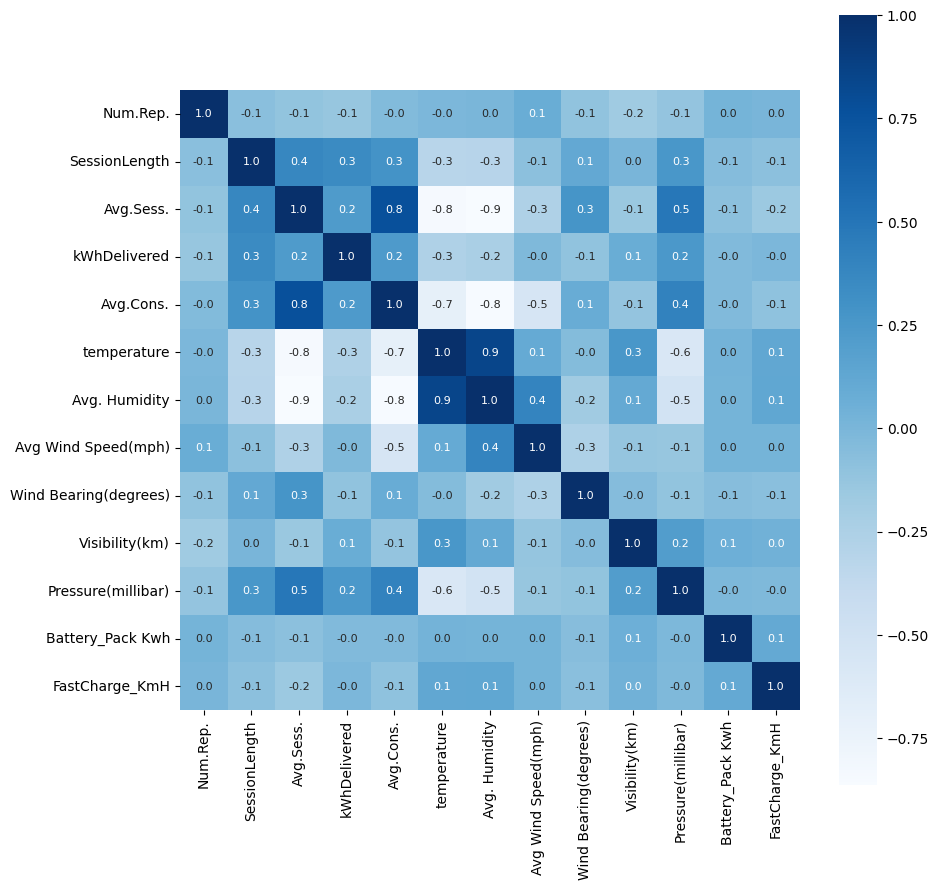

In [17]:
# constructing a heatmap to understand the correlatiom
plt.figure(figsize = (10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':8}, cmap='Blues')

In [18]:
print(correlation['SessionLength'])

Num.Rep.                -0.071010
SessionLength            1.000000
Avg.Sess.                0.380336
kWhDelivered             0.349359
Avg.Cons.                0.288598
temperature             -0.315319
Avg. Humidity           -0.303165
Avg Wind Speed(mph)     -0.081812
Wind Bearing(degrees)    0.114141
Visibility(km)           0.003940
Pressure(millibar)       0.259002
Battery_Pack Kwh        -0.054652
FastCharge_KmH          -0.079983
Name: SessionLength, dtype: float64


C:\Users\Dell\AppData\Local\Temp\ipykernel_6984\3026985986.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ev['SessionLength'],color='green')


<Axes: xlabel='SessionLength', ylabel='Density'>

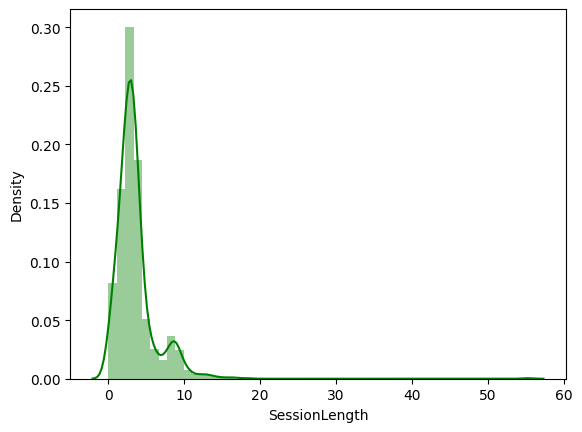

In [19]:
sns.distplot(ev['SessionLength'],color='green')

In [20]:
print(correlation['kWhDelivered'])

Num.Rep.                -0.130661
SessionLength            0.349359
Avg.Sess.                0.227223
kWhDelivered             1.000000
Avg.Cons.                0.231452
temperature             -0.262378
Avg. Humidity           -0.233600
Avg Wind Speed(mph)     -0.025725
Wind Bearing(degrees)   -0.099936
Visibility(km)           0.078063
Pressure(millibar)       0.249317
Battery_Pack Kwh        -0.026580
FastCharge_KmH          -0.006242
Name: kWhDelivered, dtype: float64


<Axes: >

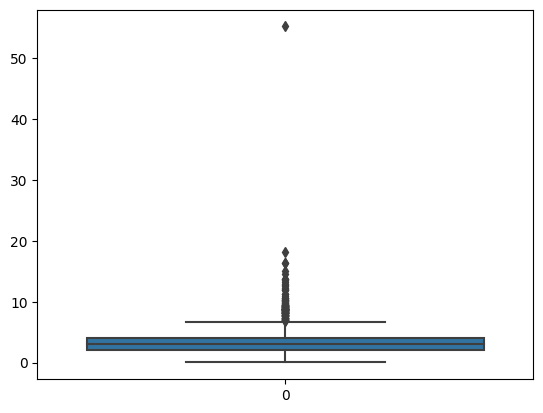

In [21]:
#Boxplot
sns.boxplot(ev['SessionLength'])

In [22]:
model=IsolationForest(n_estimators=100,max_samples='auto',contamination=0.04,max_features=1.0)
model.fit(ev[['SessionLength']])

C:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


IsolationForest(contamination=0.04)

In [23]:
ev['newlength']=model.decision_function(ev[['SessionLength']])
ev['anomaly']=model.predict(ev[['SessionLength']])
ev.head(10)

,Num.Rep.,SessionLength,Avg.Sess.,kWhDelivered,Avg.Cons.,temperature,Avg. Humidity,Avg Wind Speed(mph),Wind Bearing(degrees),Visibility(km),Pressure(millibar),Battery_Pack Kwh,FastCharge_KmH,newlength,anomaly
0,11.13,2.20,3.55,7.93,6.44,24.37,34.85,13.54,300,9.9,1004.55,70.0,940,0.193843,1
1,13.75,11.19,3.55,10.01,6.44,24.37,34.85,13.54,300,9.9,1004.55,45.0,250,-0.074910,-1
2,13.76,10.33,3.54,5.26,6.44,24.37,34.85,13.54,300,9.9,1004.55,75.0,620,-0.044629,-1
3,14.62,9.31,3.55,5.18,6.44,24.37,34.85,13.54,300,9.9,1004.55,74.0,560,0.036306,1
4,14.68,8.38,3.55,10.12,6.44,24.37,34.85,13.54,300,9.9,1004.55,28.5,190,0.065240,1
5,14.73,10.56,3.54,7.91,6.44,24.37,34.85,13.54,300,9.9,1004.55,110.0,620,-0.054144,-1
6,14.80,3.67,3.54,15.29,6.44,24.37,34.85,13.54,300,9.9,1004.55,35.8,220,0.199448,1
7,14.97,4.13,3.53,6.95,6.43,24.37,34.85,13.54,300,9.9,1004.55,45.0,420,0.161734,1
8,15.18,3.08,3.53,2.17,6.43,24.37,34.85,13.54,300,9.9,1004.55,50.0,650,0.205736,1
9,15.20,3.29,3.52,2.44,6.43,24.37,34.85,13.54,300,9.9,1004.55,77.0,540,0.203669,1


In [24]:
outliers_counter = len(ev[ev['anomaly'] ==-1])
outliers_counter 

48

In [25]:
ev_data = ev[(ev['SessionLength'] <=13)]

In [26]:
ev_data

,Num.Rep.,SessionLength,Avg.Sess.,kWhDelivered,Avg.Cons.,temperature,Avg. Humidity,Avg Wind Speed(mph),Wind Bearing(degrees),Visibility(km),Pressure(millibar),Battery_Pack Kwh,FastCharge_KmH,newlength,anomaly
0,11.13,2.20,3.55,7.93,6.44,24.37,34.85,13.54,300,9.9,1004.55,70.0,940,0.193843,1
1,13.75,11.19,3.55,10.01,6.44,24.37,34.85,13.54,300,9.9,1004.55,45.0,250,-0.074910,-1
2,13.76,10.33,3.54,5.26,6.44,24.37,34.85,13.54,300,9.9,1004.55,75.0,620,-0.044629,-1
3,14.62,9.31,3.55,5.18,6.44,24.37,34.85,13.54,300,9.9,1004.55,74.0,560,0.036306,1
4,14.68,8.38,3.55,10.12,6.44,24.37,34.85,13.54,300,9.9,1004.55,28.5,190,0.065240,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1194,16.00,3.22,2.57,1.82,3.62,35.98,40.55,10.35,305,16.1,1005.18,45.0,260,0.207247,1
1195,19.00,1.51,2.41,4.73,4.07,35.98,40.55,10.35,305,16.1,1005.18,65.0,345,0.155270,1
1196,12.00,3.28,2.70,3.69,3.85,35.98,40.55,10.35,305,17.3,1005.18,118.0,670,0.202817,1
1197,13.00,1.89,2.42,3.82,3.93,35.98,40.55,10.35,305,17.3,1005.18,28.0,215,0.169504,1


#Splitting the features and target

In [27]:
X = ev_data.drop(['SessionLength','kWhDelivered'],axis=1)
Y = ev_data['SessionLength']

In [28]:
scaler = StandardScaler()

In [29]:
scaler.fit(X)

StandardScaler()

In [30]:
standardized_data = scaler.transform(X)

In [31]:
print(standardized_data)

[[-0.96793856  2.94729991  1.6182259  ...  1.51983325  0.60369441
   0.18169967]
 [-0.29749283  2.94729991  1.6182259  ... -1.43995177 -3.5753837
  -5.50358735]
 [-0.29493388  2.90241678  1.6182259  ...  0.14717932 -3.10452149
  -5.50358735]
 ...
 [-0.74530963 -0.86776554 -2.66068058 ...  0.3616565   0.74324436
   0.18169967]
 [-0.48941432 -2.12449298 -2.52851358 ... -1.59008579  0.22523095
   0.18169967]
 [-0.74530963  0.25431253 -2.36330484 ...  0.91929716  0.76107012
   0.18169967]]


In [32]:
X = standardized_data
Y = ev_data['SessionLength']

In [33]:
print(X)

[[-0.96793856  2.94729991  1.6182259  ...  1.51983325  0.60369441
   0.18169967]
 [-0.29749283  2.94729991  1.6182259  ... -1.43995177 -3.5753837
  -5.50358735]
 [-0.29493388  2.90241678  1.6182259  ...  0.14717932 -3.10452149
  -5.50358735]
 ...
 [-0.74530963 -0.86776554 -2.66068058 ...  0.3616565   0.74324436
   0.18169967]
 [-0.48941432 -2.12449298 -2.52851358 ... -1.59008579  0.22523095
   0.18169967]
 [-0.74530963  0.25431253 -2.36330484 ...  0.91929716  0.76107012
   0.18169967]]


In [34]:
print(Y)

0        2.20
1       11.19
2       10.33
3        9.31
4        8.38
        ...  
1194     3.22
1195     1.51
1196     3.28
1197     1.89
1198     2.95
Name: SessionLength, Length: 1189, dtype: float64


In [35]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

In [36]:
regressor = RandomForestRegressor(n_estimators=100)

In [37]:
# training the model
regressor.fit(X_train,Y_train)

RandomForestRegressor()

In [38]:
# prediction on Test Data
test_data_prediction = regressor.predict(X_test)

In [39]:
print(test_data_prediction)

[ 3.7104  2.898   3.1142  3.2895  1.8805  3.2469  2.6662  2.1795  2.7496
  0.4275  2.9895  3.8644  1.9233  2.4005  2.907   2.4805  2.6924  1.5957
  2.3397  2.7796  2.324   8.3375  2.6488  2.8291  2.9611  2.6263  3.0042
  3.1753  2.9138  3.5585  3.0857  3.4969  3.0586  1.3001  3.3978  3.0038
  3.064   2.8893  2.7198  8.1586  3.0006  3.1403  3.2452  7.965   3.4666
  7.7278  2.824   3.179   8.0201  2.4437  1.0896  4.2925  3.0332  1.4494
  1.6609  3.4655  2.8815  3.2277  2.5946  2.6859  2.8097  1.1791  2.9889
  2.4356  3.1144 10.7115  2.6772  2.6643  1.9564  8.6019  1.6057  4.574
  3.8488  2.7389  2.7888  2.5599  2.1924  8.6761  1.1423  7.8798  2.1255
  2.6876  3.1409  3.0472  2.7831  6.8109  5.7298  3.1959  6.6876  1.9544
  2.8008  3.1779  3.1061  2.0902  3.6077  3.2773  8.02    2.7622  8.6536
  3.2995  3.0407  2.8901  3.0609  2.7701  8.5123  1.8967  2.1485  0.8053
  2.7011  2.3323  3.2257  3.6972  8.4989  3.1203  2.8185  2.5002  3.5854
  3.0645  3.4475  1.8758  7.0171  4.4368  2.5887  2.

In [40]:
Y_test = list(Y_test)

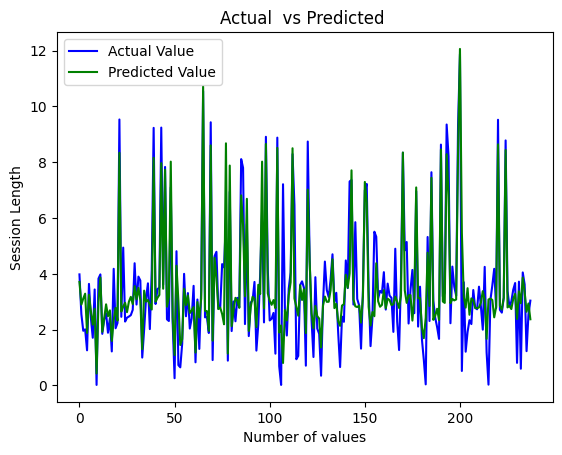

In [41]:
plt.plot(Y_test, color='blue', label = 'Actual Value')
plt.plot(test_data_prediction, color='green', label='Predicted Value')
plt.title('Actual  vs Predicted ')
plt.xlabel('Number of values')
plt.ylabel('Session Length')
plt.legend()
plt.show()

In [42]:
#Training Scores
training_data_prediction = regressor.predict(X_train)

In [43]:
mean_absolute_error(Y_train, training_data_prediction)

0.27848990536277624

In [44]:
sqrt(mean_squared_error(Y_train, training_data_prediction))

0.4634985540888793

In [45]:
# R squared error
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.9572089090199432


In [46]:
def smape(actual, predicted):
    """
    Calculate SMAPE (Symmetric Mean Absolute Percentage Error) for actual and predicted values.
    """
    actual = np.array(actual)
    predicted = np.array(predicted)
    return 100/len(actual) * np.sum(2 * np.abs(predicted - actual) / (np.abs(actual) + np.abs(predicted)))


In [47]:
smape_score = smape(Y_train, training_data_prediction)
print("SMAPE score: ", smape_score)

SMAPE score:  13.787394686275118


In [48]:
#Test Scores

In [49]:
mean_absolute_error(Y_test, test_data_prediction)

0.7348529411764705

In [50]:
rms = sqrt(mean_squared_error(Y_test, test_data_prediction))

In [51]:
print(rms)

1.089787789688718


In [52]:
# R squared error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.7614067978244042


In [53]:
def smape(actual, predicted):
    """
    Calculate SMAPE (Symmetric Mean Absolute Percentage Error) for actual and predicted values.
    """
    actual = np.array(actual)
    predicted = np.array(predicted)
    return 100/len(actual) * np.sum(2 * np.abs(predicted - actual) / (np.abs(actual) + np.abs(predicted)))


In [54]:
smape_score = smape(Y_test, test_data_prediction)
print("SMAPE score: ", smape_score)

SMAPE score:  27.74397155364484


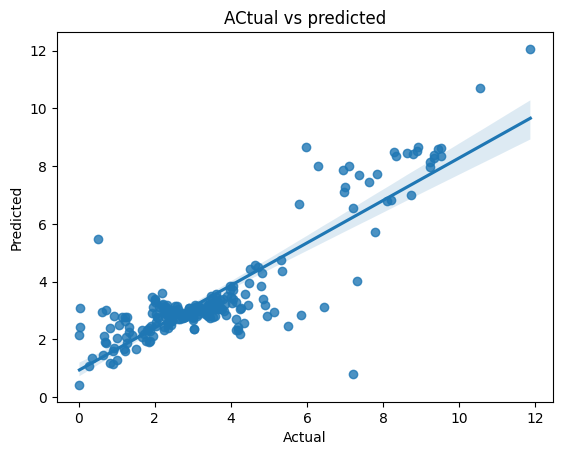

In [55]:
#Visualising
sns.regplot(x=Y_test, y=test_data_prediction)
plt.xlabel("Actual")
plt.ylabel('Predicted')
plt.title("ACtual vs predicted")
plt.show()



#SVM 

In [56]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

In [57]:
svr = SVR(kernel='rbf', C=10, gamma=0.1, epsilon=0.1)
svr.fit(X_train,Y_train)

SVR(C=10, gamma=0.1)

In [58]:
y_pred = svr.predict(X_test)
mse = mean_squared_error(Y_test, y_pred)

In [59]:
print(y_pred)

[ 2.01343481  2.56520274  3.81834235  2.33001651  1.68976531  3.75317562
  2.55081065  2.68624815  3.12976228  3.12486463  3.38677395  3.46361563
  2.41274107  2.32993118  2.62273155  2.37043059  2.67712295  2.33933622
  1.89860308  2.65630708  3.36616125  8.2635659   2.67103561  5.30232438
  3.32651023  2.98052759  3.23519709  3.31400797  2.73785998  2.46359596
  3.01147599  2.47445394  3.89453592  1.92039191  2.09974806  2.91742143
  2.92159059  1.9154636   3.64804571  8.8090543   3.18652392  2.82591327
  2.76990858  8.10848634  3.49758816  7.77171222  2.52191415  3.37571744
  8.99729328  3.07164814  3.94450317  3.89765894  3.70594678  2.23663452
  1.38993511  3.40990282  2.48504733  3.39267811  2.16600182  2.79208223
  3.17079878  2.60729273  2.73099577  1.8038183   2.54858414  9.62844048
  2.83300499  3.42581905  2.93219917  9.34683708  0.90828287  3.39891323
  4.86291795  3.03800351  3.28560878  1.41238364  4.25917588  8.63213384
  1.9162728   9.58494984  3.23213013  2.92267625  3

In [60]:
Y_test = list(Y_test)

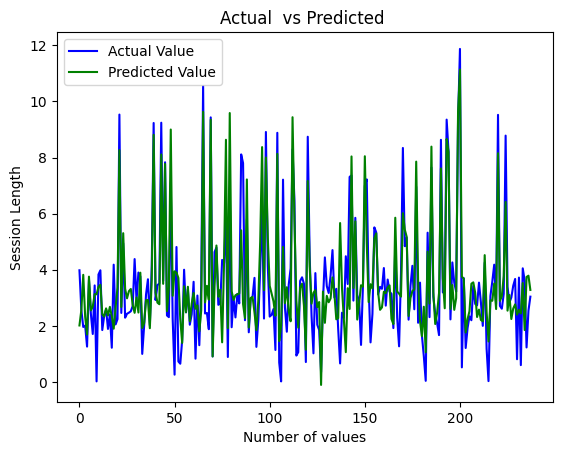

In [61]:
plt.plot(Y_test, color='blue', label = 'Actual Value')
plt.plot(y_pred, color='green', label='Predicted Value')
plt.title('Actual  vs Predicted ')
plt.xlabel('Number of values')
plt.ylabel('Session Length')
plt.legend()
plt.show()

In [62]:
mean_absolute_error(Y_test, y_pred)

0.8758284353909519

In [63]:
rms = sqrt(mean_squared_error(Y_test, y_pred))

In [64]:
print(rms)

1.2309568484198454


In [65]:
# R squared error
error_score = metrics.r2_score(Y_test, y_pred)
print("R squared error : ", error_score)

R squared error :  0.6955893458271374


In [66]:
smape_score = smape(Y_test, y_pred)
print("SMAPE score: ", smape_score)

SMAPE score:  31.905610173316287


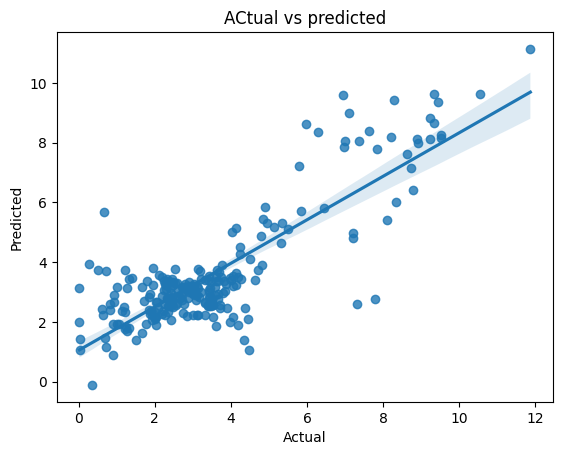

In [67]:
#Visualising
sns.regplot(x=Y_test, y=y_pred)
plt.xlabel("Actual")
plt.ylabel('Predicted')
plt.title("ACtual vs predicted")
plt.show()

#XGB

In [68]:
# loading the model
xb_model = XGBRegressor(objective='reg:squarederror', alpha=0.5)

In [69]:
# training the model with X_train
xb_model.fit(X_train, Y_train)

XGBRegressor(alpha=0.5, base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, ...)

In [70]:
test_prediction = xb_model.predict(X_test)

In [71]:
print(test_prediction)

[ 3.7301242   3.0000176   3.1378849   3.0181665   1.038218    3.489882
  2.5786684   1.7831414   2.6204839  -0.27854413  2.857454    3.7026517
  1.9991789   2.6256793   2.5559685   1.7475352   2.4865115   1.7406853
  1.1756412   3.051036    2.3067806   9.321015    2.6379833   2.5104084
  3.4492114   2.7022119   2.8415463   3.186624    3.1138492   3.461048
  2.9870086   4.0187063   3.0313952   1.5212786   2.4938483   2.8192346
  3.3335013   2.5315168   1.7182138   8.281505    3.13096     3.1558764
  2.8227756   7.5530944   3.4553068   7.6136646   2.4211287   3.0509613
  8.353314    2.332971    2.2869647   3.8103259   3.7018454   0.99059093
  1.5063447   3.7154782   2.9192698   3.3649726   2.4348752   2.5102172
  3.3207357   1.9229443   3.1109622   2.057849    3.191694   10.127771
  2.7757385   2.6670306   2.1395357   9.468483    0.4279618   4.7595625
  4.3288846   2.9672587   2.8613682   1.6975685   2.4935157   8.484563
  1.8538424   8.438172    2.4033153   2.8388214   2.863444    3.106

In [72]:
Y_test = list(Y_test)

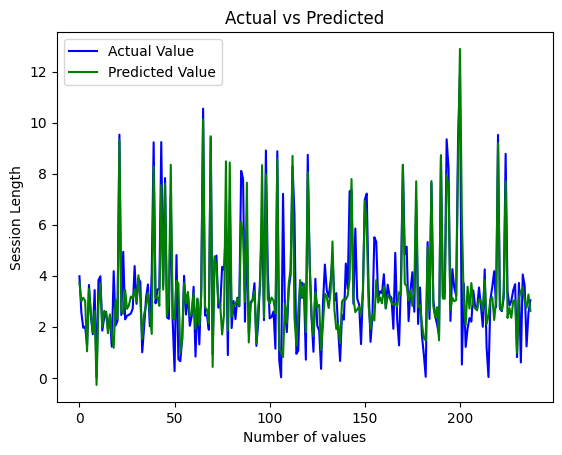

In [73]:
plt.plot(Y_test, color='blue', label = 'Actual Value')
plt.plot(test_prediction, color='green', label='Predicted Value')
plt.title('Actual vs Predicted')
plt.xlabel('Number of values')
plt.ylabel('Session Length')
plt.legend()
plt.show()

In [74]:
#Training Scores
training_data_prediction = xb_model.predict(X_train)

In [75]:
mean_absolute_error(Y_train, training_data_prediction)

0.05740420568593387

In [76]:
sqrt(mean_squared_error(Y_train, training_data_prediction))

0.07754626861957774

In [77]:
# R squared error
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.9988022162901802


In [78]:
smape_score = smape(Y_train, training_data_prediction)
print("SMAPE score: ", smape_score)


SMAPE score:  3.577281360784739


In [79]:
#Test Scores

In [80]:
mean_absolute_error(Y_test, test_prediction)

0.7335786200721726

In [81]:
rms = sqrt(mean_squared_error(Y_test, test_prediction))

In [82]:
print(rms)

1.1369372610982909


In [83]:
# R squared error
error_score = metrics.r2_score(Y_test, test_prediction)
print("R squared error : ", error_score)

R squared error :  0.7403148050498843


In [84]:
smape_score = smape(Y_test, test_prediction)
print("SMAPE score: ", smape_score)

SMAPE score:  27.47948400058719


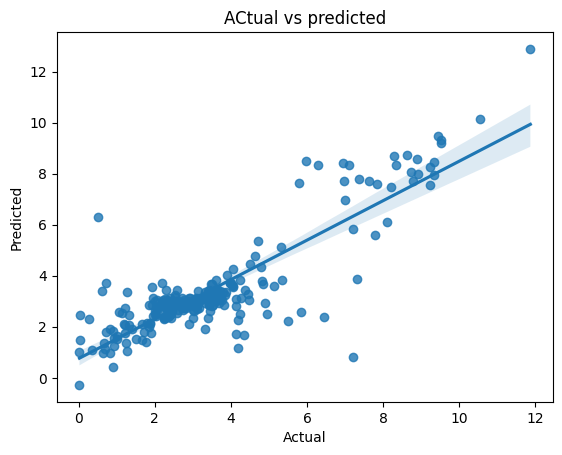

In [85]:
#Visualising
sns.regplot(x=Y_test, y=test_prediction)
plt.xlabel("Actual")
plt.ylabel('Predicted')
plt.title("ACtual vs predicted")
plt.show()

#ANN

In [86]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

In [90]:
# layers
model=Sequential()
model.add(Dense(units = 13, kernel_initializer = 'uniform', activation = 'relu', input_dim = 13))
#model.add(Dense(units = 64, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'linear'))

In [91]:
# Compile the model
model.compile(loss='mean_absolute_error',optimizer='adam')

In [92]:
# Train the model on the training dataset
model.fit(X_train, Y_train, epochs=1000, verbose=0)

In [93]:
# Use the trained model to make predictions on the test dataset
Y_pred = model.predict(X_test)

8/8 [==============================] - 0s 1ms/step


In [94]:
print(Y_pred)

[[ 2.12172   ]
 [ 2.7295494 ]
 [ 3.3374364 ]
 [ 2.819197  ]
 [ 1.4692794 ]
 [ 3.8249025 ]
 [ 2.7970912 ]
 [ 0.9272638 ]
 [ 2.8076131 ]
 [ 6.76171   ]
 [ 3.132901  ]
 [ 2.180321  ]
 [ 3.2754724 ]
 [ 2.7091455 ]
 [ 2.7940638 ]
 [ 2.4338582 ]
 [ 2.8681402 ]
 [ 0.94826823]
 [ 0.7378955 ]
 [ 2.8503382 ]
 [ 3.2532122 ]
 [ 5.964488  ]
 [ 2.9883115 ]
 [ 4.7276316 ]
 [ 2.2505248 ]
 [ 3.1115072 ]
 [ 3.0562475 ]
 [ 3.0193021 ]
 [ 2.968717  ]
 [ 2.1557057 ]
 [ 2.7655551 ]
 [ 2.3530872 ]
 [ 2.559049  ]
 [ 0.22638592]
 [ 3.614055  ]
 [ 3.0725157 ]
 [ 2.9065077 ]
 [ 2.2603571 ]
 [ 4.123603  ]
 [ 6.896428  ]
 [ 2.9713237 ]
 [ 3.011774  ]
 [ 3.6400816 ]
 [ 8.580431  ]
 [ 2.134258  ]
 [ 6.9759307 ]
 [ 2.5374005 ]
 [ 3.3205295 ]
 [ 9.05739   ]
 [ 3.3230712 ]
 [ 0.15412639]
 [ 5.4465227 ]
 [ 5.515082  ]
 [ 1.9939473 ]
 [ 2.1204371 ]
 [ 1.95558   ]
 [ 2.8713717 ]
 [ 3.4223883 ]
 [ 2.148247  ]
 [ 3.0760746 ]
 [ 3.4789839 ]
 [ 2.0357554 ]
 [ 2.7917936 ]
 [ 5.1288137 ]
 [ 2.871681  ]
 [ 6.930211  ]
 [ 2.70914

In [95]:
#Training Scores
training_data_prediction = model.predict(X_train)

30/30 [==============================] - 0s 1ms/step


In [96]:
mean_absolute_error(Y_train, training_data_prediction)

0.6068521328923829

In [97]:
sqrt(mean_squared_error(Y_train, training_data_prediction))

1.0247603159723047

In [98]:
# R squared error
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.7908291362967141


In [99]:
mean_absolute_error(Y_test, Y_pred)

1.0178716216342791

In [100]:
rms = sqrt(mean_squared_error(Y_test, Y_pred))

In [101]:
print(rms)

1.6264878891218735


In [102]:
# R squared error
error_score = metrics.r2_score(Y_test, Y_pred)
print("R squared error : ", error_score)

R squared error :  0.4685335445559815


In [103]:
def smape(actual, predicted):
    """
    Calculate SMAPE (Symmetric Mean Absolute Percentage Error) for actual and predicted values.
    """
    actual = np.array(actual)
    predicted = np.array(predicted)
    return np.mean((np.abs(actual - predicted) / (np.abs(actual) + np.abs(predicted))) * 2) * 100

In [104]:
smape_score = smape(Y_test, y_pred)
print("SMAPE score:", smape_score)

SMAPE score: 31.905610173316283


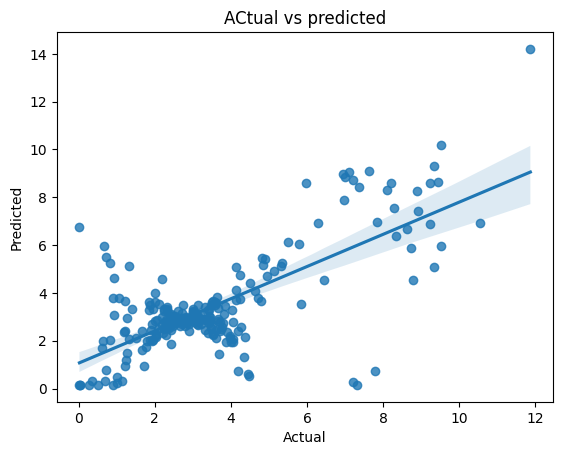

In [105]:
#Visualising
sns.regplot(x=Y_test, y=Y_pred)
plt.xlabel("Actual")
plt.ylabel('Predicted')
plt.title("ACtual vs predicted")
plt.show()

#KNN

In [106]:
from sklearn.neighbors import KNeighborsRegressor

In [107]:
k = 6
knn = KNeighborsRegressor(n_neighbors=k)
knn.fit(X_train, Y_train)
knn_pred = knn.predict(X_test)

In [108]:
#Train Scores
training_data_prediction = knn.predict(X_train)

In [109]:
mean_absolute_error(Y_train, training_data_prediction)

0.8077392218717141

In [110]:
sqrt(mean_squared_error(Y_train, training_data_prediction))

1.1809944822276799

In [111]:
# R squared error
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.7221871505748203


In [112]:
smape_score = smape(Y_train, training_data_prediction)
print("SMAPE score:", smape_score)

SMAPE score: 29.692000828366403


In [113]:
#test Scores
mean_absolute_error(Y_test, knn_pred)

0.9170868347338935

In [114]:
sqrt(mean_squared_error(Y_test, knn_pred))

1.2712035530902812

In [115]:
# R squared error
error_score = metrics.r2_score(Y_test, knn_pred)
print("R squared error : ", error_score)

R squared error :  0.6753582380211214


In [116]:
smape_score = smape(Y_test, knn_pred)
print("SMAPE score:", smape_score)

SMAPE score: 31.840766832286484


In [117]:
from sklearn.ensemble import AdaBoostRegressor

In [118]:
k = 5
knn = KNeighborsRegressor(n_neighbors=k)
adaboost = AdaBoostRegressor(estimator=knn, n_estimators=50, learning_rate=0.1)
adaboost.fit(X_train, Y_train)
ada_pred = adaboost.predict(X_test)

In [119]:
#Train Scores
training_data_prediction = adaboost.predict(X_train)

In [120]:
mean_absolute_error(Y_train, training_data_prediction)

0.6594426919032598

In [121]:
sqrt(mean_squared_error(Y_train, training_data_prediction))

0.8532546041823388

In [122]:
# R squared error
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.854984684207691


In [123]:
smape_score = smape(Y_train, training_data_prediction)
print("SMAPE score:", smape_score)

SMAPE score: 25.995860092008886


In [124]:
#Test Scores
mean_absolute_error(Y_test, ada_pred)

0.9037226890756304

In [125]:
sqrt(mean_squared_error(Y_test, ada_pred))

1.3302414072944324

In [126]:
# R squared error
error_score = metrics.r2_score(Y_test, ada_pred)
print("R squared error : ", error_score)

R squared error :  0.644503675243155


In [127]:
smape_score = smape(Y_test, ada_pred)
print("SMAPE score:", smape_score)

SMAPE score: 31.295359948863748


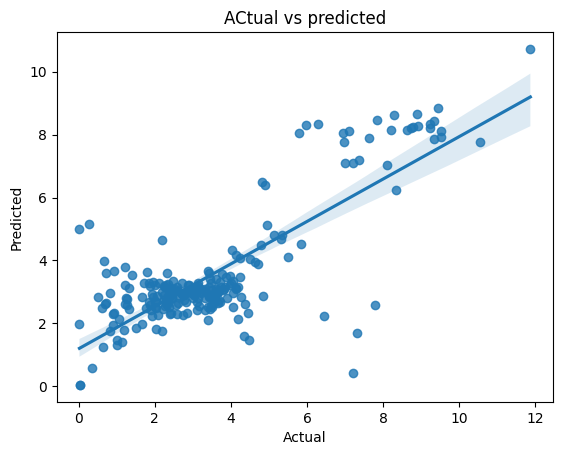

In [128]:
#Visualising
sns.regplot(x=Y_test, y=ada_pred)
plt.xlabel("Actual")
plt.ylabel('Predicted')
plt.title("ACtual vs predicted")
plt.show()

# Ensemble Learning

In [129]:
stack_regressor = StackingRegressor(estimators=[('rf', regressor),('svm',svr)])
stack_regressor.fit(X_train, Y_train)

StackingRegressor(estimators=[('rf', RandomForestRegressor()),
                              ('svm', SVR(C=10, gamma=0.1))])

In [130]:
pred=stack_regressor.predict(X_test)

In [131]:
print(pred)

[ 3.3365848   2.82191892  3.14297428  3.03563781  1.73381438  3.34062557
  2.57953326  2.22513887  2.76666002  1.1061955   3.11845437  3.76116721
  1.77800004  2.35061777  2.77842405  2.51731492  2.67738048  1.81217627
  2.1337962   2.69562281  2.54991085  8.43064155  2.6602544   3.38268388
  3.03091761  2.65053578  3.04211016  3.215191    2.81625658  2.84079402
  3.0272131   3.17721742  3.21304247  1.49613175  2.77847172  2.96105274
  2.97841799  2.56090718  2.75664847  8.60180016  3.04093416  3.0534708
  3.1526088   8.2167325   3.40276775  7.84846047  2.64398612  3.17986642
  8.4230926   2.59362371  1.98219066  4.04296574  2.88372232  1.76393784
  1.52493746  3.52332833  2.72256375  3.24091348  2.41386361  2.67235379
  2.87164268  1.46994367  2.9239017   2.07308492  2.94269249 10.65608332
  2.76382876  2.78454197  2.21675154  8.88911783  1.34332277  4.32438769
  4.06770756  2.84244418  2.89385532  2.31277949  2.63092109  8.74564383
  1.39465064  8.42500673  2.38664198  2.79457174  3.

In [132]:
#Train Scores
training_data_prediction = stack_regressor.predict(X_train)

In [133]:
mean_absolute_error(Y_train, training_data_prediction)

0.29928121595873436

In [134]:
sqrt(mean_squared_error(Y_train, training_data_prediction))

0.46488472769313366

In [135]:
# R squared error
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.9569525777863075


In [136]:
smape_score = smape(Y_train, training_data_prediction)
print("SMAPE score:", smape_score)

SMAPE score: 14.630054297217153


In [137]:
#Test Scores
mean_absolute_error(Y_test, pred)

0.750798275500524

In [138]:
rms = sqrt(mean_squared_error(Y_test, pred))

In [139]:
print(rms)

1.0664424846945815


In [140]:
# R squared error
error_score = metrics.r2_score(Y_test, pred)
print("R squared error : ", error_score)

R squared error :  0.7715195387697114


In [141]:
smape_score = smape(Y_test, pred)
print("SMAPE score:", smape_score)

SMAPE score: 28.165594659208608


In [142]:
stack_regressor = StackingRegressor(estimators=[('rf', regressor),('xb',xb_model),('svm',svr)])
stack_regressor.fit(X_train, Y_train)

StackingRegressor(estimators=[('rf', RandomForestRegressor()),
                              ('xb',
                               XGBRegressor(alpha=0.5, base_score=None,
                                            booster=None, callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            gpu_id=None, grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            n_estimators=100, n_jobs=None,
                                            num_parallel_tree=None,
                                            predictor=None, ...)),
                              ('svm', SVR(C=10, gamma=0.1))])

In [143]:
predict_ed = stack_regressor.predict(X_test)

In [144]:
print(predict_ed)

[ 3.40671429  2.89807265  3.30377885  2.95944627  1.36079986  3.50506977
  2.6023675   1.99462258  2.72816987  0.54514435  3.01024432  3.70479818
  2.01889677  2.52938522  2.66096412  2.06812889  2.59481735  1.85013184
  1.53652296  2.89066201  2.49651521  8.947743    2.66257091  3.10299897
  3.31559137  2.72602101  2.9577851   3.21170071  3.00318384  3.25023458
  3.02801498  3.61428303  3.19355017  1.56163502  2.59338966  2.88872991
  3.16947881  2.49874554  2.34179621  8.35181201  3.11874567  3.09307813
  2.95342955  7.7156902   3.47640313  7.67019603  2.53743902  3.14609557
  8.38065776  2.50118823  2.29058501  3.91066619  3.33308985  1.29543221
  1.61317011  3.58975302  2.81045094  3.3113034   2.4363519   2.61926102
  3.15529285  1.89727238  3.02989604  2.08700768  3.06088951 10.15988576
  2.76798437  2.80489976  2.2550053   9.23918908  0.79140778  4.47296399
  4.30614358  2.94014538  2.92938771  1.82386661  2.75929692  8.54186976
  1.72854132  8.47663941  2.56177535  2.84813904  2

In [145]:
#Train Scores
training_data_prediction = stack_regressor.predict(X_train)

In [146]:
mean_absolute_error(Y_train, training_data_prediction)

0.18136261347889598

In [147]:
sqrt(mean_squared_error(Y_train, training_data_prediction))

0.2701076928561614

In [148]:
# R squared error
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.9854678290329949


In [149]:
smape_score = smape(Y_train, training_data_prediction)
print("SMAPE score:", smape_score)

SMAPE score: 10.34985502694077


In [150]:
#Test Scores
mean_absolute_error(Y_test, predict_ed)

0.730011293323535

In [151]:
sqrt(mean_squared_error(Y_test, predict_ed))

1.0569614981827857

In [152]:
# R squared error
error_score = metrics.r2_score(Y_test, predict_ed)
print("R squared error : ", error_score)

R squared error :  0.7755639969298307


In [153]:
smape_score = smape(Y_test, predict_ed)
print("SMAPE score:", smape_score)

SMAPE score: 27.466848963228397


In [154]:
vote_regressor = VotingRegressor(estimators=[('rf', regressor),('svm',svr)])
vote_regressor.fit(X_train, Y_train)

VotingRegressor(estimators=[('rf', RandomForestRegressor()),
                            ('svm', SVR(C=10, gamma=0.1))])

In [155]:
predict = vote_regressor.predict(X_test)

In [156]:
print(predict)

[ 2.8408174   2.73000137  3.34452117  2.85085825  1.71863265  3.56388781
  2.59470532  2.35562408  2.95053114  1.91823231  3.24213697  3.65575781
  2.13162053  2.37471559  2.78331577  2.4065653   2.71421147  2.05341811
  2.05930154  2.77850354  2.84893063  8.40128295  2.66561781  4.00621219
  3.19070512  2.7878638   3.11999854  3.26625398  2.83362999  2.88569798
  3.071788    3.03432697  3.54401796  1.62374595  2.63562403  2.96046072
  2.97759529  2.3921318   3.19362285  8.54857715  3.08406196  2.95200663
  3.04190429  7.99934317  3.46254408  7.67335611  2.63325707  3.23800872
  8.57739664  2.78002407  2.60550159  4.05817947  3.03252339  1.89486726
  1.63971756  3.48755141  2.67517366  3.33023905  2.34195091  2.74504112
  2.97684939  1.89514636  2.89984789  2.12040915  2.82549207 10.13927024
  2.8081525   3.03100953  2.47789959  8.97786854  1.27339144  4.01155662
  4.29250897  2.91275175  3.04885439  1.97949182  3.19533794  8.64881692
  1.5933864   8.79767492  2.80011506  2.86193813  3

In [157]:
#Train Scores
training_data_prediction = vote_regressor.predict(X_train)

In [158]:
mean_absolute_error(Y_train, training_data_prediction)

0.38545453375211136

In [159]:
sqrt(mean_squared_error(Y_train, training_data_prediction))

0.6051488747284288

In [160]:
# R squared error
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.9270574314932569


In [161]:
smape_score = smape(Y_test, predict_ed)
print("SMAPE score:", smape_score)

SMAPE score: 27.466848963228397


In [162]:
#Test Scores
mean_absolute_error(Y_test, predict)

0.7705450423381269

In [163]:
rms = sqrt(mean_squared_error(Y_test, predict))

In [164]:
print(rms)

1.0469933024543592


In [165]:
# R squared error
error_score = metrics.r2_score(Y_test, predict)
print("R squared error : ", error_score)

R squared error :  0.779777343204411


In [166]:
smape_score = smape(Y_test, predict)
print("SMAPE score:", smape_score)

SMAPE score: 28.675568740815528


In [167]:
vote_regressor = VotingRegressor(estimators=[('rf', regressor),('xb',xb_model),('svm',svr)])
vote_regressor.fit(X_train, Y_train)

VotingRegressor(estimators=[('rf', RandomForestRegressor()),
                            ('xb',
                             XGBRegressor(alpha=0.5, base_score=None,
                                          booster=None, callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None, max_bin=None,
                                          max_cat_threshold=None,
                                          max_cat_to_onehot=None,
                                          max_delta_step=None, max_depth=None,
                                          max_leaves=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n_jobs=None,
                                          num_parallel_tree=None,
                                          predictor=None, ...)),
                            ('svm', SVR(C=10, gamma=0.1))])

In [168]:
predict_ = vote_regressor.predict(X_test)

In [169]:
print(predict_)

[ 3.13141968  2.83560679  3.28490907  2.86542768  1.47886111  3.5054192
  2.573793    2.17776318  2.81038205  1.06954017  3.06170934  3.62868912
  2.10207332  2.45187015  2.69893336  2.17998861  2.63034481  1.90800719
  1.76244809  2.85548099  2.67214728  8.65642709  2.66270631  3.43761093
  3.21917386  2.75827982  3.01241446  3.23681067  2.90883638  3.10921462
  3.01389486  3.33855342  3.33154371  1.60685684  2.61166546  2.91795201
  3.07116398  2.44766013  2.67605317  8.38345298  3.1048613   3.05582989
  2.94856139  7.82526024  3.48113164  7.66622561  2.58564763  3.1836929
  8.43893589  2.60207308  2.54785594  3.95389493  3.27676406  1.73784182
  1.51589326  3.55346033  2.78120571  3.3355169   2.37369236  2.65159981
  3.13217816  1.91777901  2.94668598  2.04422241  2.94329272 10.10637062
  2.77648116  2.90414988  2.32054495  9.05354002  0.95701489  4.23965857
  4.39590085  2.9236874   2.98179232  1.84258406  3.00223054  8.58409891
  1.70390506  8.64980739  2.57268181  2.84456589  3.0

In [170]:
#Train Scores
training_data_prediction = vote_regressor.predict(X_train)

In [171]:
mean_absolute_error(Y_train, training_data_prediction)

0.26939871946383376

In [172]:
sqrt(mean_squared_error(Y_train, training_data_prediction))

0.4168502017945763

In [173]:
# R squared error
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.965388802625596


In [174]:
smape_score = smape(Y_test, predict_ed)
print("SMAPE score:", smape_score)

SMAPE score: 27.466848963228397


In [175]:
#Test scores
mean_absolute_error(Y_test, predict_)

0.7421085222345274

In [176]:
sqrt(mean_squared_error(Y_test, predict_))

1.0412274106471324

In [177]:
# R squared error
error_score = metrics.r2_score(Y_test, predict_)
print("R squared error : ", error_score)

R squared error :  0.7821962385495839


In [178]:
smape_score = smape(Y_test, predict_)
print("SMAPE score:", smape_score)

SMAPE score: 27.839002585696377
